In [72]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from time import perf_counter 


from sklearn.neural_network import MLPClassifier

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn import model_selection
from sklearn.metrics import classification_report
from IPython.display import display

from sklearn.model_selection import cross_val_score
import tensorflow as tf
from tensorflow import keras
from mlxtend.frequent_patterns import apriori, association_rules




In [73]:
df= pd.read_csv("Telco-customer-churn.csv")

In [74]:
del df["customerID"]  #usuwam ID

In [75]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [76]:
df["SeniorCitizen"]=pd.Categorical(df["SeniorCitizen"])   #zmiana na kategoryczne

In [77]:
df["TotalCharges"]=pd.to_numeric(arg=df["TotalCharges"], errors= 'coerce')   #zmiana na float

In [78]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [79]:
df=df.fillna(0)   #NA wypełniam zerami

In [80]:
numerics = ['float64', 'int64']
numeric_ds = df.select_dtypes(include=numerics)
objects_ds = df.select_dtypes(exclude=numerics)

In [81]:
numeric_ds.describe()   

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304
std,24.559481,30.090047,2266.794470
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


In [82]:
numeric_ds = pd.concat([numeric_ds,df["Churn"]],axis=1) #Add the 'Churn' variable to the numeric dataset

Text(0, 0.5, 'Number of customers')

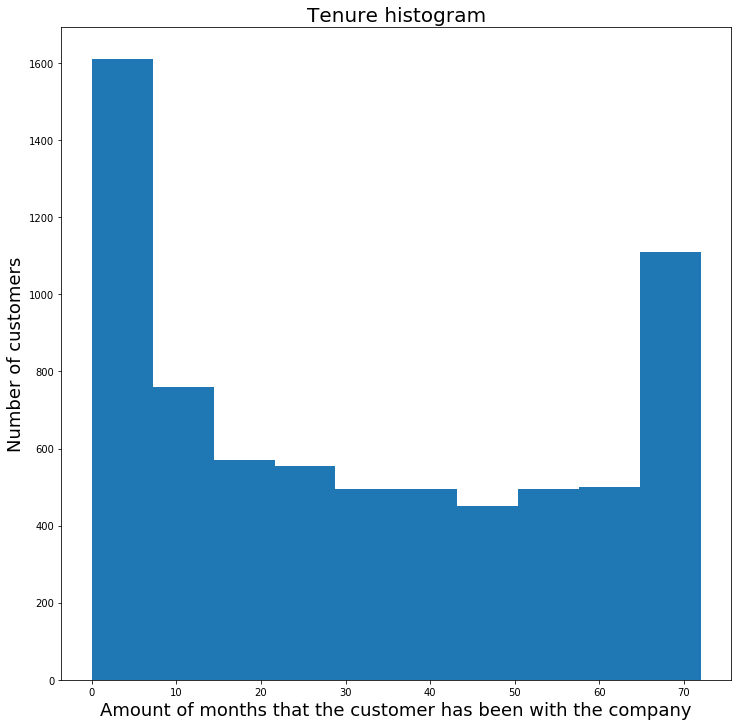

In [83]:
fig, ax = plt.subplots(figsize=(12,12))
y=numeric_ds["tenure"]
ax.hist(y)
ax.set_title("Tenure histogram",fontsize=20)
ax.set_xlabel("Amount of months that the customer has been with the company",fontsize=18)
ax.set_ylabel("Number of customers",fontsize=18)

Text(0, 0.5, 'Number of customers')

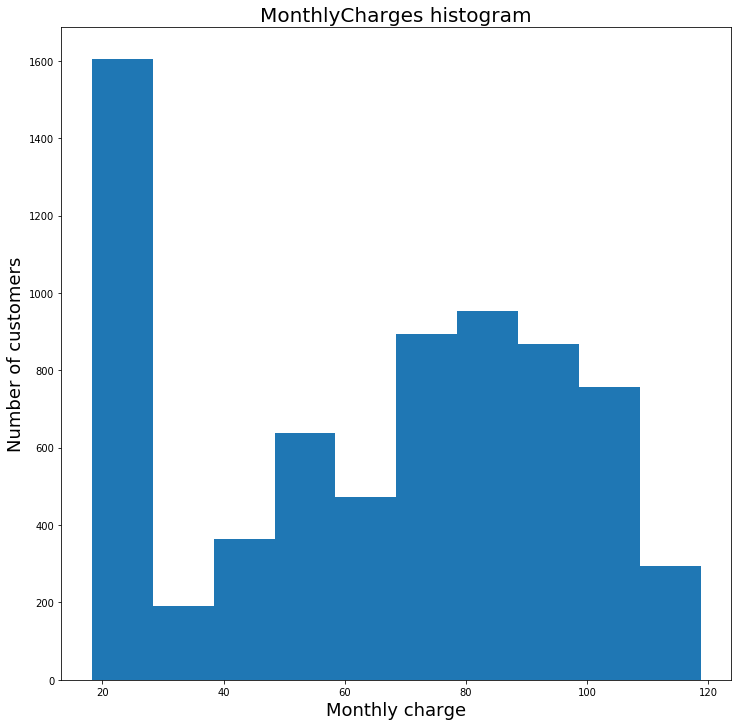

In [84]:
fig, ax = plt.subplots(figsize=(12,12))

y=numeric_ds["MonthlyCharges"]
ax.hist(y)
ax.set_title("MonthlyCharges histogram", fontsize=20)
ax.set_xlabel("Monthly charge",fontsize=18)
ax.set_ylabel("Number of customers",fontsize=18)

Text(0, 0.5, 'Number of customers')

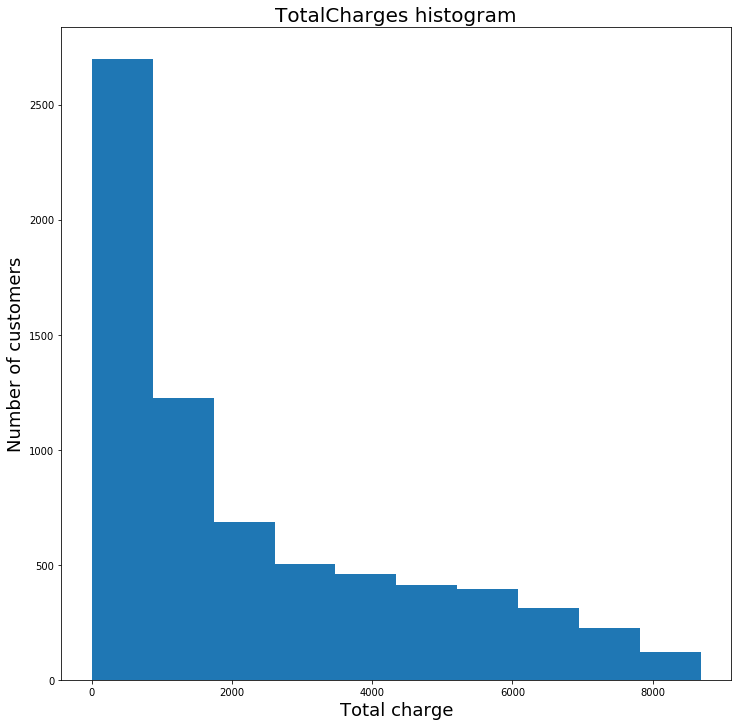

In [85]:
fig, ax = plt.subplots(figsize=(12,12))

y=numeric_ds["TotalCharges"]
ax.hist(y)
ax.set_title("TotalCharges histogram", fontsize=20)
ax.set_xlabel("Total charge",fontsize=18)
ax.set_ylabel("Number of customers",fontsize=18)

In [86]:
objects_ds.describe().T

,count,unique,top,freq
gender,7043,2,Male,3555
SeniorCitizen,7043,2,0,5901
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


In [87]:
MonthlyCharges_bins=pd.cut(numeric_ds["MonthlyCharges"], bins=[0,35,60,130], labels=['low','medium','high'])


In [88]:
tenure_bins=pd.cut(numeric_ds["tenure"], bins=[0,20,60,80], labels=['low','medium','high'])


In [89]:
TotalCharges_bins=pd.cut(numeric_ds["TotalCharges"], bins=[0,1000,4000,10000], labels=['low','medium','high'])


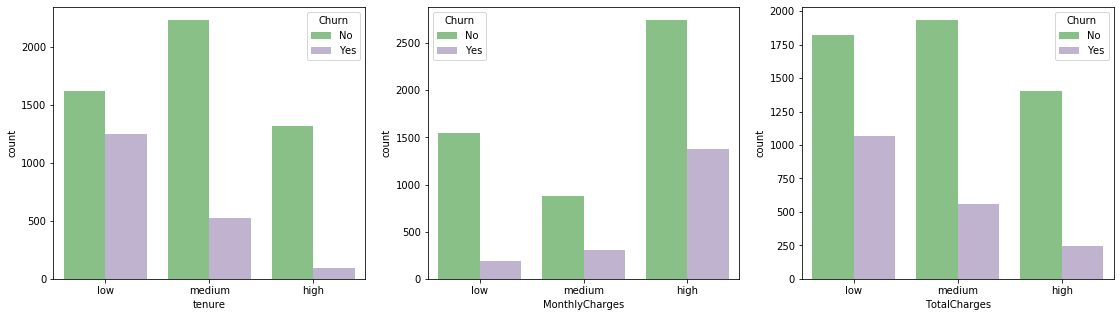

In [90]:
fig,ax =plt.subplots(1,3,figsize=(19,5))
sns.countplot(x=tenure_bins, hue="Churn", data=numeric_ds, palette="Accent", ax=ax[0])                   
sns.countplot(x=MonthlyCharges_bins, hue="Churn", data=numeric_ds, palette="Accent", ax=ax[1])
sns.countplot(x=TotalCharges_bins, hue="Churn", data=numeric_ds, palette="Accent", ax=ax[2])
                                                                                            


In [91]:
bins=pd.DataFrame([tenure_bins, MonthlyCharges_bins, TotalCharges_bins]).T
bins

,tenure,MonthlyCharges,TotalCharges
0,low,low,low
1,medium,medium,medium
2,low,medium,low
3,medium,medium,medium
4,low,high,low
...,...,...,...
7038,medium,high,medium
7039,high,high,high
7040,low,low,low
7041,low,high,low


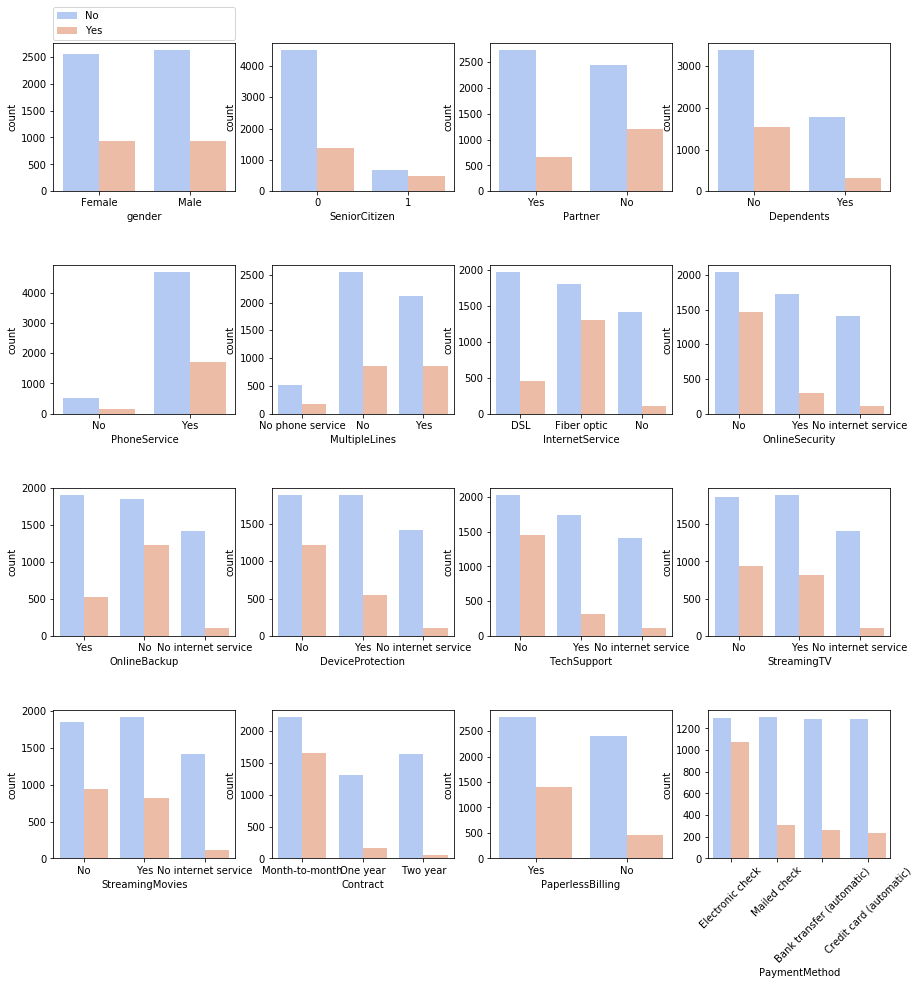

In [92]:
fig,ax =plt.subplots(4,4,figsize=(15,15))
fig.subplots_adjust(hspace=.5)
for i in range(0,16):
    g = sns.countplot(x=objects_ds.iloc[:,i], hue=objects_ds["Churn"], ax=ax[divmod(i,4)], palette="coolwarm")
    g.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, mode="expand", borderaxespad=0.) if i==0 else g.legend_.remove()
for tick in ax[3,3].get_xticklabels():
    tick.set_rotation(45)


In [93]:
objects_ds

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,No
7039,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),No
7040,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
7041,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,Yes


In [94]:
data=pd.concat([bins,objects_ds],axis=1)  # Concatenate bins with object variables
for i in list(data.columns):
    data[i] = pd.Categorical(data[i]) # Convert all the variables into categorical
dummy = pd.get_dummies(data) # Transform the categorical variables into binary vectors
dummy.T

,0,1,2,3,4,5,6,7,8,9,...,7033,7034,7035,7036,7037,7038,7039,7040,7041,7042
tenure_high,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,1,0,1,0,0,1
tenure_low,1,0,1,0,1,1,0,1,0,0,...,0,0,1,1,0,0,0,1,1,0
tenure_medium,0,1,0,1,0,0,1,0,1,0,...,1,0,0,0,0,1,0,0,0,0
MonthlyCharges_high,0,0,0,0,1,1,1,0,1,0,...,1,1,1,1,0,1,1,0,1,1
MonthlyCharges_low,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
MonthlyCharges_medium,0,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
TotalCharges_high,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1
TotalCharges_low,1,0,1,0,1,1,0,1,0,0,...,0,0,0,1,0,0,0,1,1,0
TotalCharges_medium,0,1,0,1,0,0,1,0,1,1,...,1,0,1,0,1,1,0,0,0,0
gender_Female,1,0,0,0,1,1,0,1,1,0,...,0,1,0,1,1,0,1,1,0,0


In [95]:
features = dummy.drop(["Churn_Yes", "Churn_No"], axis=1).columns

X = dummy[features].values
Y = dummy["Churn_Yes"].values

X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=0.3)


# KNN k=3


Time: 0.74276349999991
Accuracy:  0.7378135352579271
[[1260  257]
 [ 297  299]]


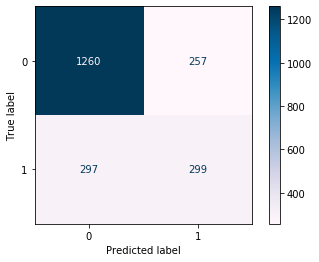

In [96]:
from sklearn import metrics
st_time= perf_counter()
knn3 = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn3.fit(X_train, Y_train)

st_time= perf_counter()
test_pred= knn3.predict(X_validation)
end_time=perf_counter()
time_knn3=end_time-st_time
print("Time:", end_time-st_time)
accuracy_knn3=metrics.accuracy_score(Y_validation, test_pred)
print("Accuracy: ", accuracy_knn3)
print(confusion_matrix(Y_validation, test_pred))
plot_confusion_matrix(knn3,X_validation, Y_validation,cmap="PuBu")

# KNN k=8

Time: 0.9694611999998415
Accuracy:  0.7709417889256981
[[1365  152]
 [ 332  264]]


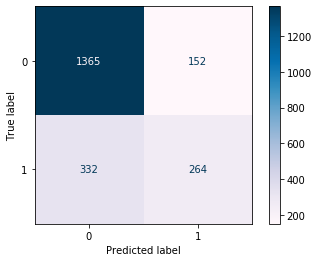

In [97]:
from sklearn import metrics

st_time=perf_counter()
knn8 = KNeighborsClassifier(n_neighbors=8, metric='euclidean')
knn8.fit(X_train, Y_train)

test_pred= knn8.predict(X_validation)
end_time=perf_counter()
time_knn8=end_time-st_time
print("Time:", end_time-st_time)

accuracy_knn8=metrics.accuracy_score(Y_validation, test_pred)
print("Accuracy: ", accuracy_knn8)
print(confusion_matrix(Y_validation, test_pred))
plot_confusion_matrix(knn8,X_validation, Y_validation,cmap="PuBu")

# KNN k=20

Time: 0.9477152999997998
Accuracy:  0.7931850449597728
[[1361  156]
 [ 281  315]]


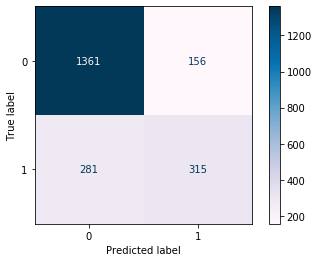

In [98]:
from sklearn import metrics
st_time= perf_counter()
knn20 = KNeighborsClassifier(n_neighbors=20, metric='euclidean')
knn20.fit(X_train, Y_train)

test_pred= knn20.predict(X_validation)
end_time=perf_counter()
time_knn20=end_time-st_time
print("Time:", end_time-st_time)
accuracy_knn20=metrics.accuracy_score(Y_validation, test_pred)
print("Accuracy: ", accuracy_knn20)
print(confusion_matrix(Y_validation, test_pred))
plot_confusion_matrix(knn20,X_validation, Y_validation,cmap="PuBu")

# Drzewo decyzyjne

Time: 0.03937919999998485
Accuracy:  0.7368670137245622
[[1262  255]
 [ 301  295]]


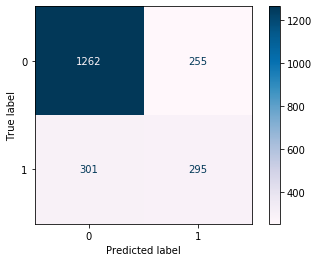

In [99]:
DT =  DecisionTreeClassifier()
st_time= perf_counter()
DT.fit(X_train, Y_train)

test_pred= DT.predict(X_validation)
end_time=perf_counter()
time_DT=end_time-st_time
print("Time:", end_time-st_time)
accuracy_DT=metrics.accuracy_score(Y_validation, test_pred)
print("Accuracy: ", accuracy_DT)
print(confusion_matrix(Y_validation, test_pred))
plot_confusion_matrix(DT,X_validation, Y_validation,cmap="PuBu")

# NAIVE BAYES

Time: 0.015324899999995978
Accuracy: 0.7061050638902036
[[973 544]
 [ 77 519]]


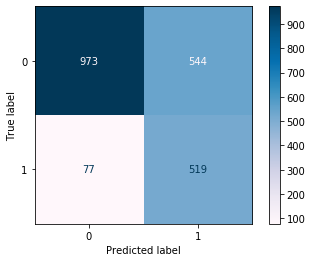

In [100]:
NB =  GaussianNB()
st_time= perf_counter()
NB.fit(X_train, Y_train)

test_pred= NB.predict(X_validation)

end_time=perf_counter()
time_NB=end_time-st_time
print("Time:", end_time-st_time)

accuracy_NB=metrics.accuracy_score(Y_validation, test_pred)

print("Accuracy:", accuracy_NB)
print(confusion_matrix(Y_validation, test_pred))
plot_confusion_matrix(NB,X_validation, Y_validation,cmap="PuBu")



# Artificial network-  multi-layer perceptron

Time: 6.317196299999978
Accuracy: 0.9559867486985328
[[1470   47]
 [  46  550]]


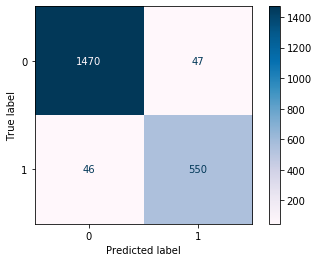

In [101]:
st_time= perf_counter()
ann = MLPClassifier(hidden_layer_sizes=(20,40,20),max_iter=900,activation='relu',
                    solver='adam',alpha=0.0001,random_state=42).fit(X_validation,Y_validation)

test_pred= ann.predict(X_validation)

end_time=perf_counter()
time_ann=end_time-st_time
print("Time:", end_time-st_time)
accuracy_MLP= accuracy_score(Y_validation, test_pred)
print("Accuracy:", accuracy_MLP)
print(confusion_matrix(Y_validation, test_pred))

plot_confusion_matrix(ann,X_validation, Y_validation,cmap="PuBu")


# Random forest

Time: 0.03943780000008701
Accuracy: 0.9659252247988642
[[1486   31]
 [  41  555]]


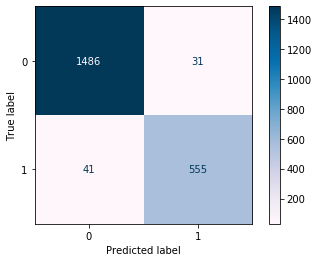

In [102]:
RF = RandomForestClassifier(n_estimators=100).fit(X_validation,Y_validation)
st_time= perf_counter()

test_pred= RF.predict(X_validation)
end_time=perf_counter()
time_RF=end_time-st_time
print("Time:", end_time-st_time)
accuracy_RF= accuracy_score(Y_validation, test_pred)
print("Accuracy:", accuracy_RF)
print(confusion_matrix(Y_validation, test_pred))
plot_confusion_matrix(RF,X_validation, Y_validation,cmap="PuBu")


# SVM

Time: 2.0682006999995792
Accuracy: 0.7903454803596782
[[1375  142]
 [ 301  295]]


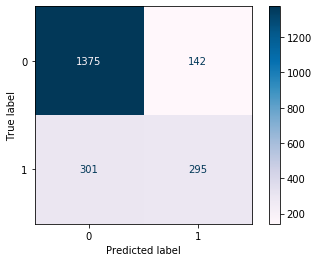

In [120]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=1.0, random_state=1)
st_time= perf_counter()
svm.fit(X_train, Y_train)

test_pred= svm.predict(X_validation)

end_time=perf_counter()
time_svm=end_time-st_time
print("Time:", end_time-st_time)

accuracy_svm= accuracy_score(Y_validation, test_pred)
print("Accuracy:", accuracy_svm)
print(confusion_matrix(Y_validation, test_pred))
plot_confusion_matrix(svm,X_validation, Y_validation,cmap="PuBu")

# Gradient boosting

Time: 0.005870100000265666
Accuracy: 0.8267865593942262
[[1365  152]
 [ 214  382]]


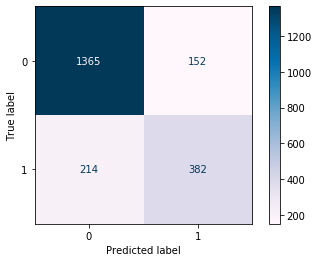

In [103]:
gbc = GradientBoostingClassifier(n_estimators=100).fit(X_validation,Y_validation)
st_time= perf_counter()
test_pred= gbc.predict(X_validation)
end_time=perf_counter()
time_gbc=end_time-st_time
print("Time:", end_time-st_time)
accuracy_gbc= accuracy_score(Y_validation, test_pred)
print("Accuracy:", accuracy_gbc)
print(confusion_matrix(Y_validation, test_pred))
plot_confusion_matrix(gbc,X_validation, Y_validation,cmap="PuBu")



# Neural network 

In [104]:
model = keras.Sequential()
model.add(keras.layers.Dense(100,activation="selu",kernel_initializer= "he_normal",input_dim = X_train.shape[1]))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(52,activation="selu",kernel_initializer= "he_normal"))
# model.add(keras.layers.BatchNormalization())
# model.add(keras.layers.Dense(20,activation="selu",kernel_initializer= "he_normal"))
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Dense(2,activation="softmax"))


model.compile(optimizer='adam',loss="sparse_categorical_crossentropy", metrics=["accuracy"])

model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 100)               5300      
_________________________________________________________________
batch_normalization_2 (Batch (None, 100)               400       
_________________________________________________________________
dense_4 (Dense)              (None, 52)                5252      
_________________________________________________________________
batch_normalization_3 (Batch (None, 52)                208       
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 106       
Total params: 11,266
Trainable params: 10,962
Non-trainable params: 304
_________________________________________________________________


In [105]:
st_time=perf_counter()
history = model.fit(X_train, Y_train, epochs=20, batch_size= 50, validation_split=0.2)
end_time=perf_counter()
time_NN=end_time-st_time
print(time_NN)

Train on 3944 samples, validate on 986 samples
Epoch 1/20
3944/3944 [==============================] - 1s 195us/sample - loss: 0.5555 - accuracy: 0.7282 - val_loss: 0.4518 - val_accuracy: 0.7819
Epoch 2/20
3944/3944 [==============================] - 0s 55us/sample - loss: 0.4599 - accuracy: 0.7797 - val_loss: 0.4397 - val_accuracy: 0.7809
Epoch 3/20
3944/3944 [==============================] - 0s 47us/sample - loss: 0.4407 - accuracy: 0.7868 - val_loss: 0.4290 - val_accuracy: 0.7951
Epoch 4/20
3944/3944 [==============================] - 0s 53us/sample - loss: 0.4285 - accuracy: 0.7923 - val_loss: 0.4206 - val_accuracy: 0.7982
Epoch 5/20
3944/3944 [==============================] - 0s 52us/sample - loss: 0.4297 - accuracy: 0.7964 - val_loss: 0.4214 - val_accuracy: 0.7901
Epoch 6/20
3944/3944 [==============================] - 0s 47us/sample - loss: 0.4206 - accuracy: 0.7997 - val_loss: 0.4246 - val_accuracy: 0.7840
Epoch 7/20
3944/3944 [==============================] - 0s 52us/sample

In [106]:
score1 = model.evaluate(x=X_validation, y=Y_validation)

print('Loss:', score1[0])
print('Accuracy:', score1[1])
accuracy_NN=score1[1]

2113/2113 [==============================] - 0s 36us/sample - loss: 0.4323 - accuracy: 0.7922
Loss: 0.43227010141657923
Accuracy: 0.79223853


In [107]:
predictions = model.predict(X_validation)
predictions
y_pred = (predictions > 0.5)
matrix = metrics.confusion_matrix(Y_validation, y_pred.argmax(axis=1))
matrix

array([[1344,  173],
       [ 266,  330]], dtype=int64)

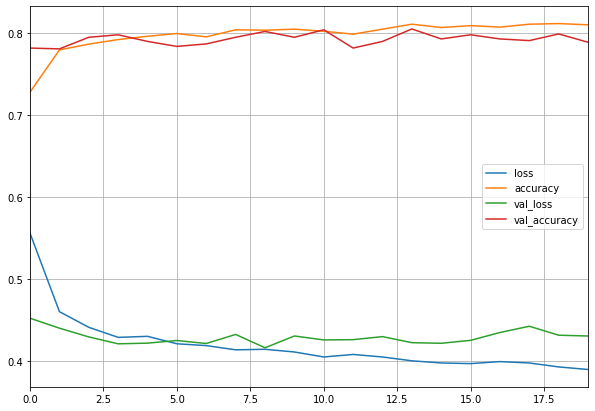

In [108]:
pd.DataFrame(history.history).plot(figsize=(10, 7))
plt.grid(True)
plt.show()

# CZAS

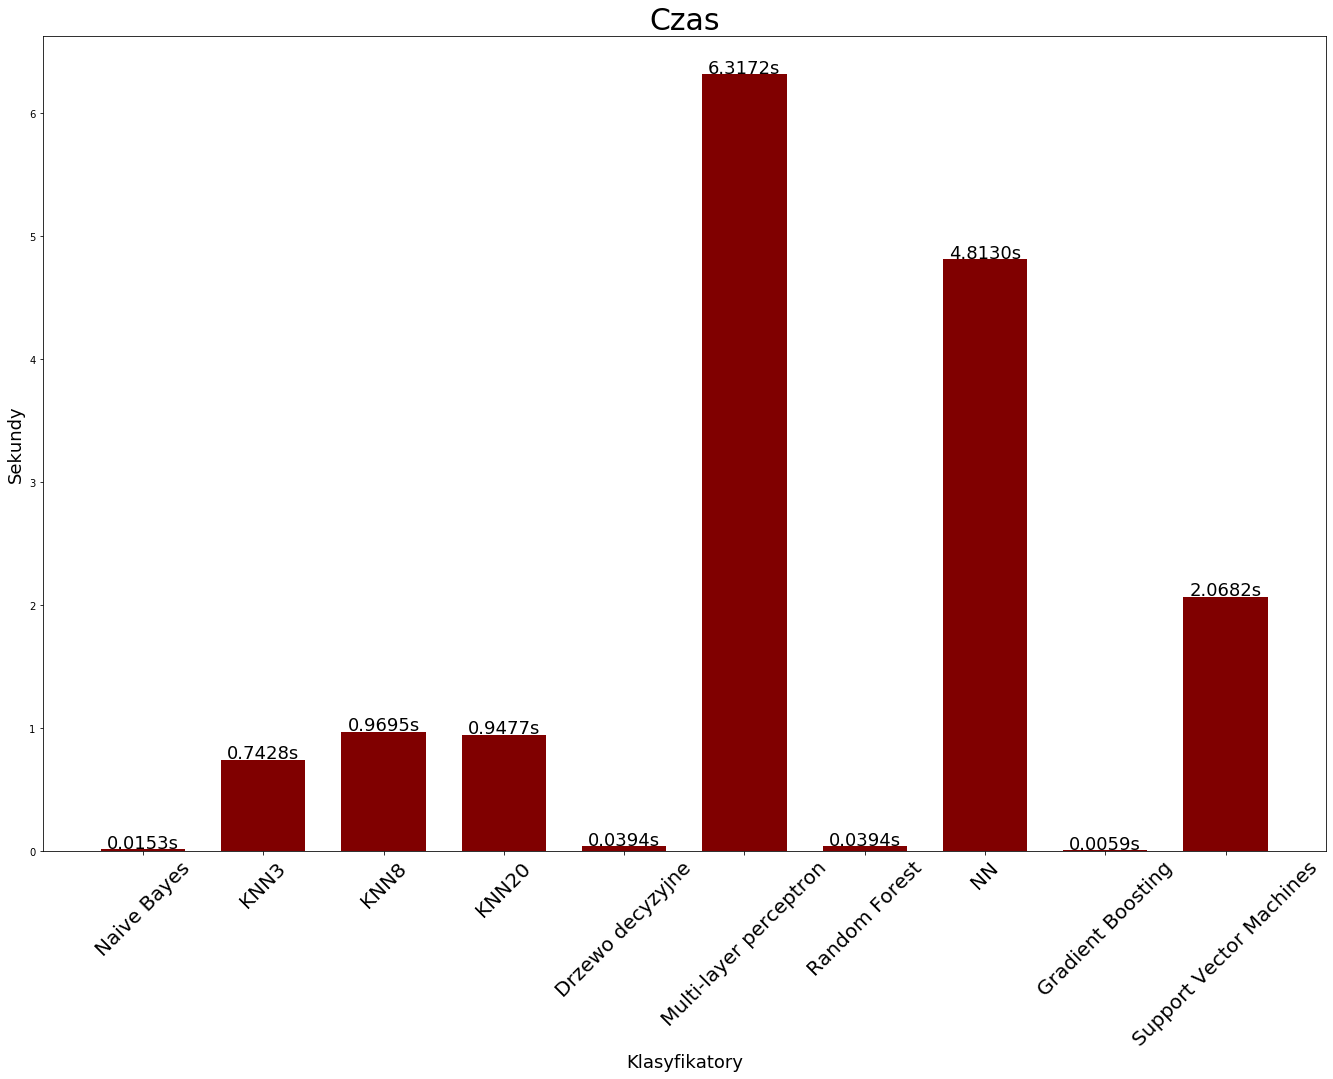

In [160]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize =(23, 15)) 
klasyfikator = ['Naive Bayes', 'KNN3', 'KNN8', 'KNN20', 'Drzewo decyzyjne', "Multi-layer perceptron", "Random Forest" , "NN", "Gradient Boosting", "Support Vector Machines"]
result = [time_NB, time_knn3, time_knn8, time_knn20,time_DT, time_ann,time_RF, time_NN, time_gbc, time_svm]

x = np.arange(len(klasyfikator))  # the label locations
width = 0.7  # the width of the bars
rects= ax.bar(klasyfikator, result, width , color='maroon')

for tick in ax.get_xticklabels():
    tick.set_rotation(45)
    
for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.4f}s'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 6),  
                    textcoords="offset points",
                    ha='center', va='center', fontsize=18)
# plt.rc('xtick', labelsize=20)
ax.set_title('Czas', fontsize= 30)
plt.xlabel("Klasyfikatory", fontsize=18) 
plt.ylabel("Sekundy", fontsize=18) 
plt.show()


# DOKŁADNOŚCI

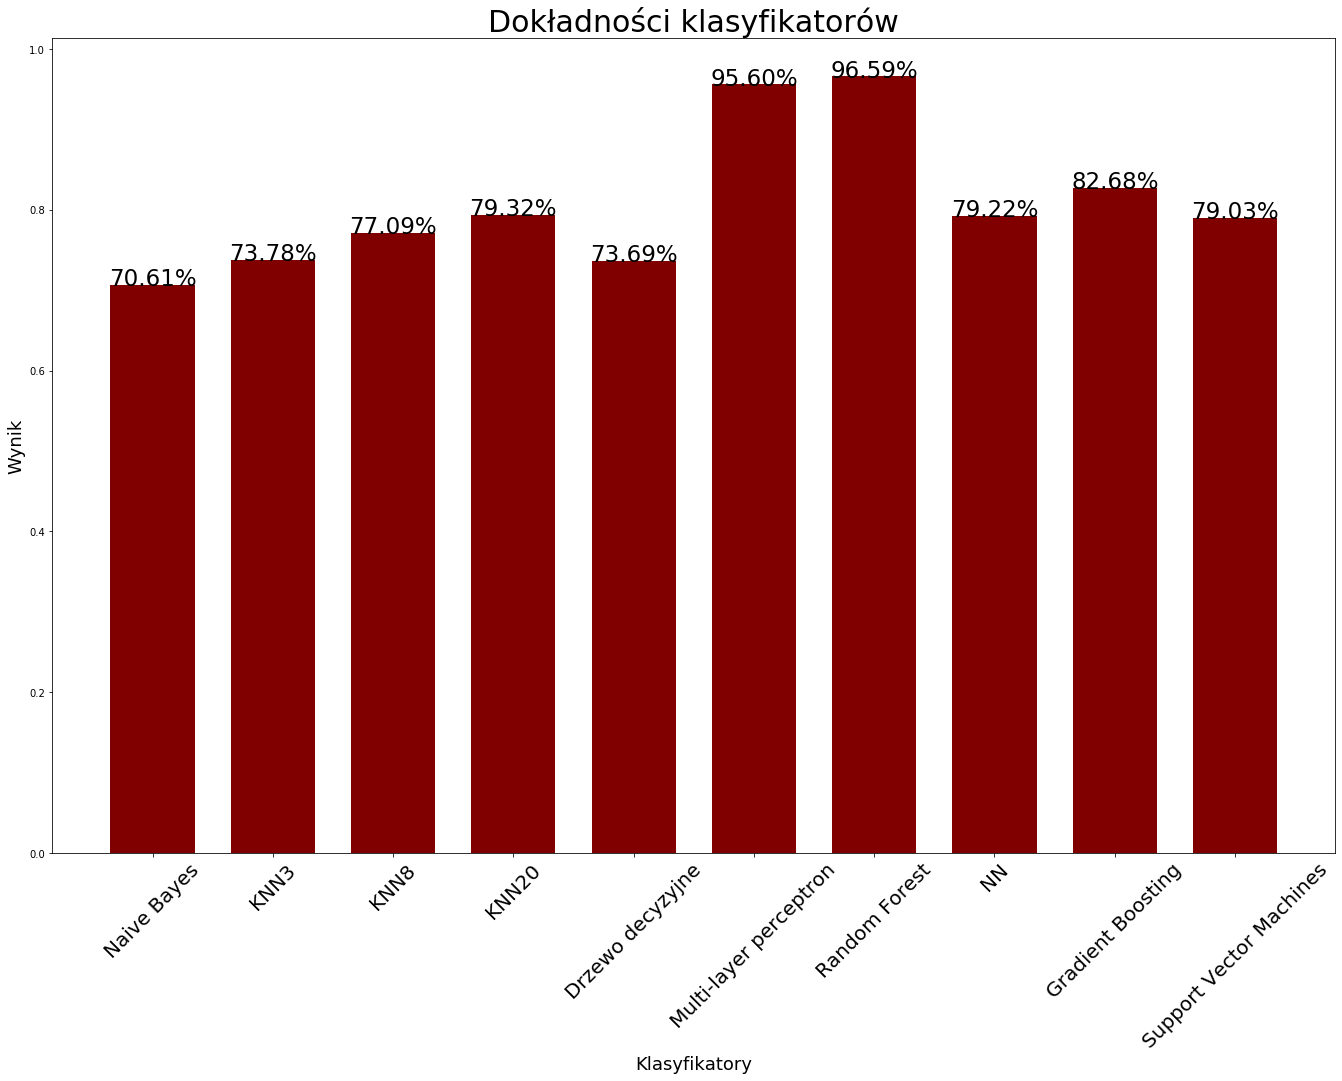

In [166]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize =(23, 15)) 
klasyfikator = ['Naive Bayes', 'KNN3', 'KNN8', 'KNN20', 'Drzewo decyzyjne', "Multi-layer perceptron", "Random Forest", "NN", "Gradient Boosting","Support Vector Machines"]
result = [accuracy_NB,accuracy_knn3,accuracy_knn8,accuracy_knn20,accuracy_DT,accuracy_MLP,accuracy_RF, accuracy_NN, accuracy_gbc, accuracy_svm]

x = np.arange(len(klasyfikator))  # the label locations
width = 0.7  # the width of the bars
rects= ax.bar(klasyfikator, result, width , color='maroon')

for tick in ax.get_xticklabels():
    tick.set_rotation(45)
    
for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2f}%'.format(height*100),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 6),  
                    textcoords="offset points",
                    ha='center', va='center', fontsize=23)


plt.rc('xtick', labelsize=20)

ax.set_title('Dokładności klasyfikatorów', fontsize= 30)
plt.xlabel("Klasyfikatory", fontsize=18) 
plt.ylabel("Wynik", fontsize=18) 
plt.show()

# ASSOCIATION

In [1]:
apriori(dummy, min_support=0.5, use_colnames=True, max_len=None, verbose=0, low_memory=False)
freq_items = apriori(dummy, min_support=0.6, use_colnames=True, verbose=1)
rules = association_rules(freq_items, metric="confidence", min_threshold=0.6)


NameError: name 'apriori' is not defined

In [2]:
rules

NameError: name 'rules' is not defined